In [1]:
import sys
import pickle
import seaborn as sns

sys.path.insert(1, '../')
from Prepare_Events_Functions import *
from Plot_events_functions import *

In [2]:
color_mapping_loading_5 = {'F2': (0.0, 0.0, 1.0, 0.6),   'F1': (0.0, 0.6902, 1.0, 0.6),
    'C': (0.5, 0.5, 0.5, 0.6), 'B1': (0.8039, 0.0, 0.0, 0.6),'B2': (0.5451, 0.0, 0.0, 0.6)} 
color_mapping_loading_3 = {'F': 'LightBlue', 'C': 'Grey', 'B': 'DarkRed'} 

quintile_mapping = {1: 'F2', 2: 'F1', 3: 'C', 4: 'B1', 5: 'B2'}
quintile_cats_loading_5 = ['F2','F1', 'C', 'B1', 'B2']
quintile_cats_loading_3 = ['F', 'C', 'B']

present_future_lookup = {'bc005': 'Present','bc006': 'Present','bc007': 'Present','bc009': 'Present','bc010': 'Present',
                         'bc011': 'Present', 'bc012': 'Present','bc013': 'Present','bc015': 'Present','bc016': 'Present', 
                         'bc017': 'Present','bc018': 'Present',
                        'nimrod': 'NIMROD',
                        'bb189': 'Future', 'bb192': 'Future','bb195': 'Future','bb198': 'Future','bb201': 'Future',
                        'bb204': 'Future','bb208': 'Future','bb211': 'Future','bb216': 'Future','bb219': 'Future',
                        'bb222': 'Future', 'bb225': 'Future'}

ids = ['nimrod', 
       'bc005', 'bc006', 'bc007', 'bc009', 'bc010','bc011', 'bc012','bc013','bc015', 'bc016', 'bc017', 'bc018',
       'bb189','bb192', 'bb195', 'bb198', 'bb201', 'bb204','bb208' ,'bb211','bb216', 'bb219','bb222','bb225']

# Define the corresponding labels for each identifier
labels = [f'UKCP18_present ({id})' if present_future_lookup[id] == 'Present' else f'UKCP18_future ({id})' if present_future_lookup[id] == 'Future' else 'NIMROD' for id in ids]

In [3]:
# Define all configurations in a dictionary
loading_profiles_config = {
    'Loading_profile_molly': {
        'quintile_cats': quintile_cats_loading_5,
        'color_mapping': color_mapping_loading_5,
        'order': ['F2', 'F1', 'C', 'B1', 'B2']},
    'Loading_profile_molly_3': {
        'quintile_cats': quintile_cats_loading_3,
        'color_mapping': color_mapping_loading_3,
        'order': ['F', 'C', 'B']},
    'Loading_profile_third_molly': {
        'quintile_cats': quintile_cats_loading_3,
        'color_mapping': color_mapping_loading_3,
        'order': ['F', 'C', 'B']}}

# Set the loading_profile
loading_profile = 'Loading_profile_molly'

# Access the configurations for the selected loading_profile
profile_config = loading_profiles_config[loading_profile]
quintile_cats = profile_config['quintile_cats']
color_mapping = profile_config['color_mapping']
order = profile_config['order']

# Read in data

In [4]:
with open("/nfs/a319/gy17m2a/PhD/ProcessedData/Profiles/All_30mins/dataframes.pkl", 'rb') as file:
    dataframes = pickle.load(file)  

In [5]:
for key, dataframe in dataframes.items():
    dataframe['Loading_profile_molly_3'] = dataframe['Loading_profile_molly'].apply(from_5_to_3)

### Create versions of dataframes dictionary, which only keep some of the events

In [6]:
dataframes_summer = {id: df[df["season"] == 'Summer'] for id, df in dataframes.items()}
dataframes_shortdurations = {id: df[df["duration"] < 6] for id, df in dataframes.items()}
dataframes_veryshortdurations = {id: df[df["duration"] < 3] for id, df in dataframes.items()}
dataframes_lessshortdurations = {id: df[df["duration"] < 10] for id, df in dataframes.items()}
dataframes_top10percent = {id: keep_top_x_percent(10,df ) for id, df in dataframes.items()}
dataframes_top1percent = {id: keep_top_x_percent(1,df ) for id, df in dataframes.items()}
dataframes_tophalfpercent = {id: keep_top_x_percent(0.5,df ) for id, df in dataframes.items()}
dataframes_top20percent = {id: keep_top_x_percent(20,df ) for id, df in dataframes.items()}

dataframes_top10percent_shortdurations = {id: keep_top_x_percent(10,df ) for id, df in dataframes_shortdurations.items()}
dataframes_top10percent_veryshortdurations = {id: keep_top_x_percent(10,df ) for id, df in dataframes_veryshortdurations.items()}
dataframes_top10percent_summer = {id: keep_top_x_percent(10,df ) for id, df in dataframes_summer.items()}

### Create one dataframe including data from all present/future ensemble members in one

In [7]:
present_ids = [id for id in ids if present_future_lookup.get(id) == 'Present']
present_dataframes = pd.concat([dataframes[id] for id in present_ids], ignore_index=True)
present_dataframes_top20percent= pd.concat([dataframes_top20percent[id] for id in present_ids], ignore_index=True)
present_dataframes_top10percent= pd.concat([dataframes_top10percent[id] for id in present_ids], ignore_index=True)
present_dataframes_top1percent= pd.concat([dataframes_top1percent[id] for id in present_ids], ignore_index=True)
present_dataframes_tophalfpercent= pd.concat([dataframes_tophalfpercent[id] for id in present_ids], ignore_index=True)

present_dataframes_shortdurations= pd.concat([dataframes_shortdurations[id] for id in present_ids], ignore_index=True)
present_dataframes_veryshortdurations= pd.concat([dataframes_veryshortdurations[id] for id in present_ids], ignore_index=True)
present_dataframes_lessshortdurations= pd.concat([dataframes_lessshortdurations[id] for id in present_ids], ignore_index=True)

future_ids = [id for id in ids if present_future_lookup.get(id) == 'Future']
future_dataframes = pd.concat([dataframes[id] for id in future_ids], ignore_index=True)
future_dataframes_top20percent= pd.concat([dataframes_top20percent[id] for id in future_ids], ignore_index=True)
future_dataframes_top10percent= pd.concat([dataframes_top10percent[id] for id in future_ids], ignore_index=True)
future_dataframes_top1percent= pd.concat([dataframes_top1percent[id] for id in future_ids], ignore_index=True)
future_dataframes_tophalfpercent= pd.concat([dataframes_tophalfpercent[id] for id in future_ids], ignore_index=True)

future_dataframes_shortdurations= pd.concat([dataframes_shortdurations[id] for id in future_ids], ignore_index=True)
future_dataframes_veryshortdurations= pd.concat([dataframes_veryshortdurations[id] for id in future_ids], ignore_index=True)
future_dataframes_lessshortdurations= pd.concat([dataframes_lessshortdurations[id] for id in future_ids], ignore_index=True)

### Create dataframes for plotting boxplots

In [8]:
combined_df_loading = prepare_combined_data(dataframes, loading_profile, ids, present_future_lookup)
combined_df_shortdurations_loading = prepare_combined_data(dataframes_shortdurations, loading_profile, ids,present_future_lookup)
combined_df_veryshortdurations_loading = prepare_combined_data(dataframes_veryshortdurations, loading_profile, ids, present_future_lookup)
combined_df_lessshortdurations_loading = prepare_combined_data(dataframes_lessshortdurations, loading_profile, ids, present_future_lookup)

combined_df_durations_notpersonalised = prepare_combined_data(dataframes, 'DurationRange_notpersonalised', ids, present_future_lookup)
combined_df_durations_personalised = prepare_combined_data(dataframes, 'DurationRange_personalised', ids, present_future_lookup)
combined_df_durations = prepare_combined_data(dataframes, 'duration', ids, present_future_lookup)

combined_df_loading_summer = prepare_combined_data(dataframes_summer, loading_profile, ids, present_future_lookup)

combined_df_loading_top20percent = prepare_combined_data(dataframes_top20percent, loading_profile, ids, present_future_lookup)
combined_df_loading_top10percent = prepare_combined_data(dataframes_top10percent, loading_profile, ids, present_future_lookup)
combined_df_loading_top1percent = prepare_combined_data(dataframes_top1percent, loading_profile, ids, present_future_lookup)
combined_df_loading_tophalfpercent = prepare_combined_data(dataframes_tophalfpercent, loading_profile, ids, present_future_lookup)

combined_df_loading_top10percent_shortdurations = prepare_combined_data(dataframes_top10percent_shortdurations, loading_profile, ids, present_future_lookup)
combined_df_loading_top10percent_veryshortdurations = prepare_combined_data(dataframes_top10percent_veryshortdurations, loading_profile, ids, present_future_lookup)
combined_df_loading_top10percent_summer = prepare_combined_data(dataframes_top10percent_summer, loading_profile, ids, present_future_lookup)

## Mosaic plot comparing loading 

In [ ]:
dataframes_top10percent_shortdurations

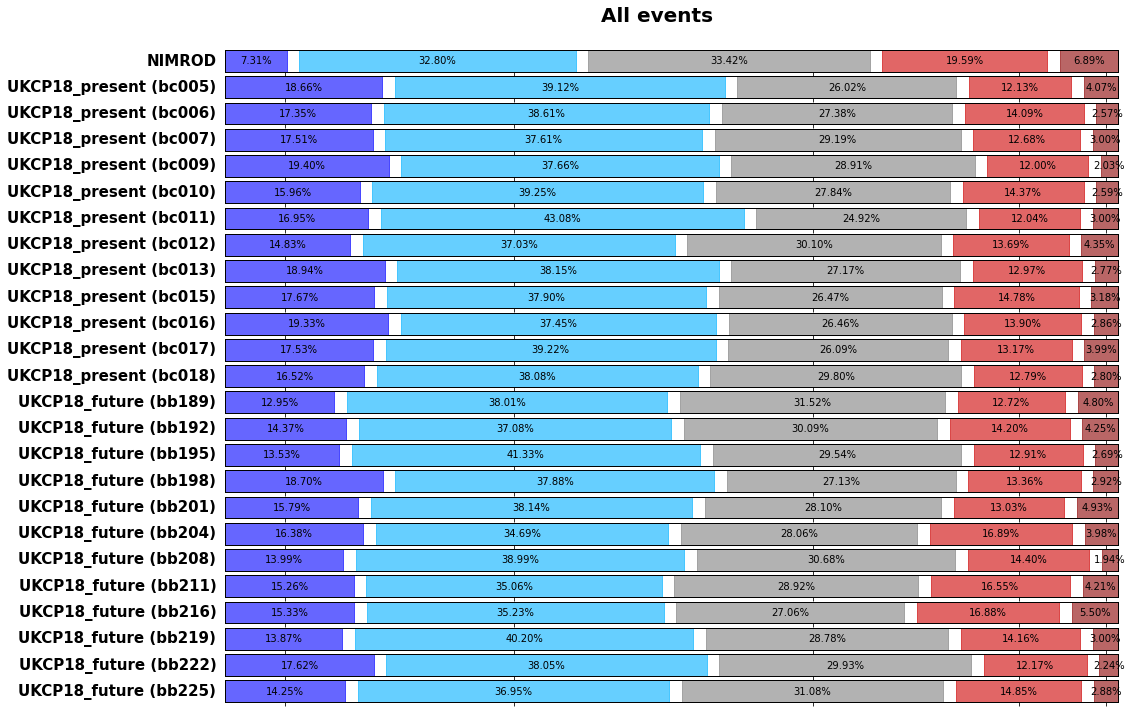

In [9]:
# Create the subplots
fig, axs = plt.subplots(nrows=len(ids), figsize=(16, 12), sharex=True)

# Loop over each id and create the plots
for i, id in enumerate(ids):
    create_single_variable_mosaic_plot_pctlabels(axs[i], dataframes_top10percent_shortdurations[id], loading_profile, 
        quintile_cats, color_mapping,  labels[i])

# Add the overall title
fig.suptitle('All events', fontweight="bold", fontsize=20, y=0.93);

In [ ]:
def create_single_variable_mosaic_plot_pctlabels(ax, data, split_variable, order, color_mapping, title):
           
    # Count the occurrences and reshape for mosaic plot
    count_data = data[split_variable].value_counts().reindex(order, fill_value=0)
    
    # Convert to dictionary format suitable for mosaic plot
    mosaic_data = count_data.to_dict()
    
    # Function to specify properties including colors based on cross_variable
    def props(key):
        # Extract category from key if it's a tuple
        if isinstance(key, tuple):
            category = key[0]  # Extract the first element from the tuple
        else:
            category = key  # Use directly if it's not a tuple
        color = color_mapping.get(category, (0.0, 0.0, 0.0, 0.6))  # Default to black if not found
        return {'color': color}
    
    # Calculate total number of occurrences for percentage calculation
    total_count = count_data.sum()
    
    # Plot the mosaic plot with automatic labels
    labelizer = lambda key: ''
    fig, rects = mosaic(mosaic_data, title='', labelizer = labelizer, properties=props, ax=ax, gap=0.015, horizontal=True)
    ax.invert_yaxis()  # Optional: Invert y-axis to match standard bar plot orientation
    ax.set_xticklabels([])  # Remove x-axis labels
    
    the_ls = range(0,len(order))
    if split_variable == 'Loading_profile_molly': 
        the_ls = [the_ls[0]] + [x * 6 for x in the_ls[1:]]
    else:
        the_ls = [the_ls[0]] + [x * 4 for x in the_ls[1:]]

    # Manually replace the labels with percentage labels
    counter=0
    for key, (x1, y1, x2, y2) in rects.items():
        count = mosaic_data[key[0]]
        percentage = (count / total_count) * 100
        label = f'{percentage:.2f}%'
        
        # Find the label at this position and replace its text
        for text in ax.texts:
            if counter in the_ls:
                text.set_text(label)
                text.set_fontsize(10)
                text.set_color('black')
            counter=counter+1
            
    for key, (x1, y1, x2, y2) in rects.items():
        if x1 == 0:  # Check if this is the leftmost bar
            ax.text(x1-0.01, (y1 + y2) / 2, title, va='center', ha='right', fontsize=15, color='black', weight='bold')  

In [43]:
my_dict = {'Present (UKCP18)' :present_dataframes, 'Future (UKCP18)':future_dataframes,
           'NIMROD':dataframes["nimrod"]}
short_ids = ['Present (UKCP18)', 'Future (UKCP18)', 'NIMROD']


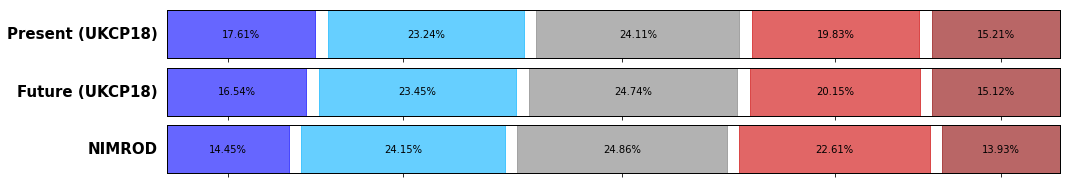

In [49]:
# Create the subplots
fig, axs = plt.subplots(nrows=len(short_ids), figsize=(16, 3), sharex=True)

# Loop over each id and create the plots
for i, id in enumerate(short_ids):
    create_single_variable_mosaic_plot_pctlabels(axs[i], my_dict[id], loading_profile, 
        quintile_cats, color_mapping,  short_ids[i])

# Add the overall title
# fig.suptitle('All events', fontweight="bold", fontsize=20);

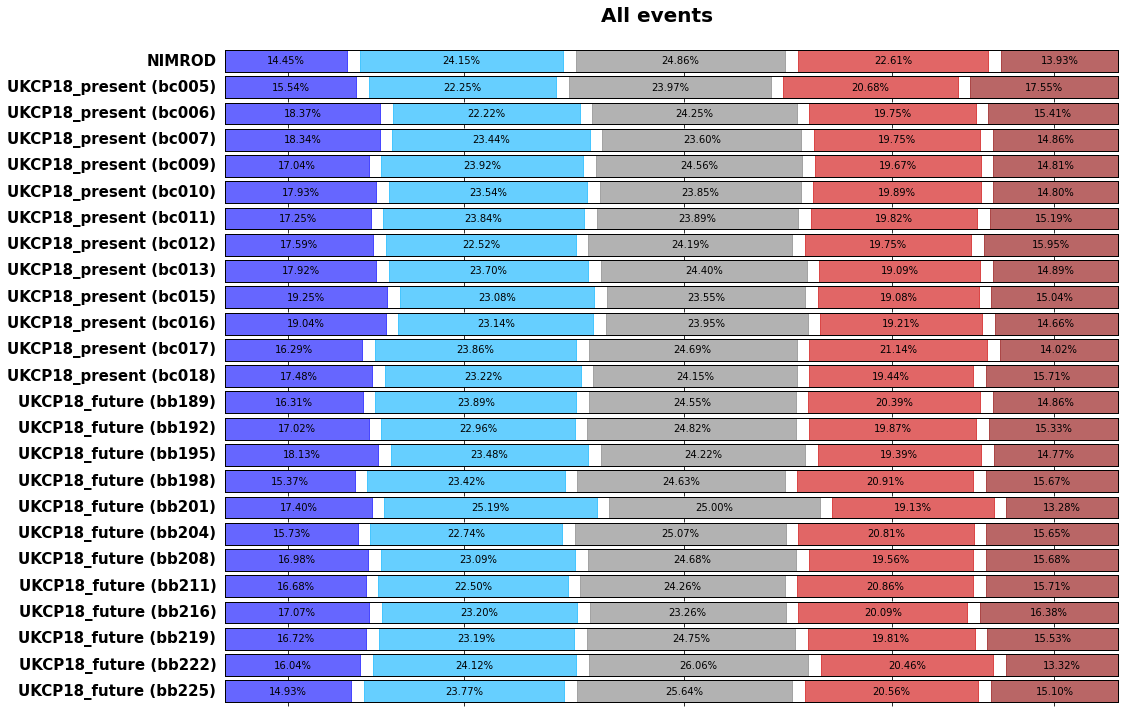

In [48]:
# Create the subplots
fig, axs = plt.subplots(nrows=len(ids), figsize=(16, 12), sharex=True)

# Loop over each id and create the plots
for i, id in enumerate(ids):
    create_single_variable_mosaic_plot_pctlabels(axs[i], dataframes[id], loading_profile, 
        quintile_cats, color_mapping,  labels[i])

# Add the overall title
fig.suptitle('All events', fontweight="bold", fontsize=20, y=0.93);

## Comparing loading categories for different rarities of events

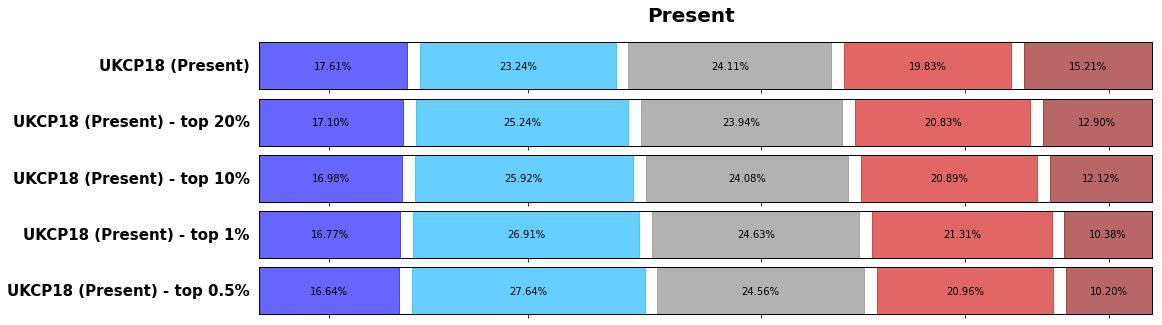

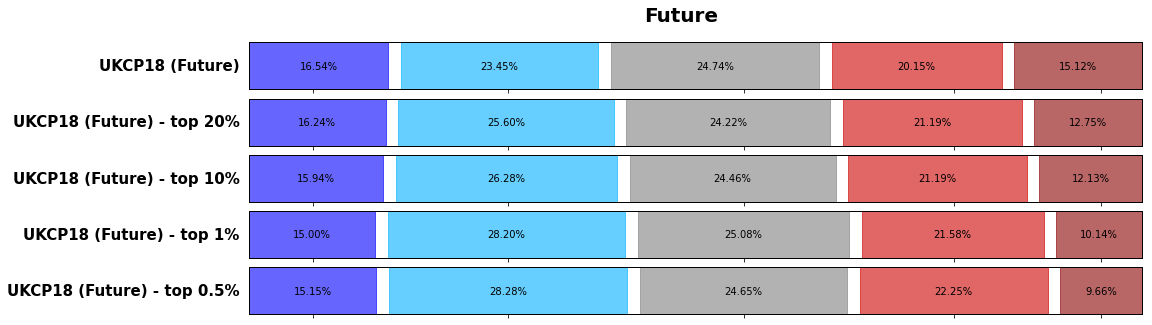

In [10]:
fig, axs = plt.subplots(nrows=5, figsize=(16, 5), sharex=True)
create_single_variable_mosaic_plot_pctlabels(axs[0], present_dataframes, loading_profile, 
    quintile_cats, color_mapping,  'UKCP18 (Present)')
create_single_variable_mosaic_plot_pctlabels(axs[1], present_dataframes_top20percent,  loading_profile, 
    quintile_cats, color_mapping,  'UKCP18 (Present) - top 20%')
create_single_variable_mosaic_plot_pctlabels(axs[2], present_dataframes_top10percent,  loading_profile, 
    quintile_cats, color_mapping,  'UKCP18 (Present) - top 10%')
create_single_variable_mosaic_plot_pctlabels(axs[3], present_dataframes_top1percent,  loading_profile, 
    quintile_cats, color_mapping,  'UKCP18 (Present) - top 1%')
create_single_variable_mosaic_plot_pctlabels(axs[4], present_dataframes_tophalfpercent,  loading_profile, 
    quintile_cats, color_mapping,  'UKCP18 (Present) - top 0.5%')
fig.suptitle('Present', fontweight="bold", fontsize=20);

fig, axs = plt.subplots(nrows=5, figsize=(16, 5), sharex=True)
create_single_variable_mosaic_plot_pctlabels(axs[0], future_dataframes,  loading_profile,
    quintile_cats, color_mapping,  'UKCP18 (Future)')
create_single_variable_mosaic_plot_pctlabels(axs[1], future_dataframes_top20percent,  loading_profile, 
    quintile_cats, color_mapping,  'UKCP18 (Future) - top 20%')
create_single_variable_mosaic_plot_pctlabels(axs[2], future_dataframes_top10percent, loading_profile, 
    quintile_cats, color_mapping,  'UKCP18 (Future) - top 10%')
create_single_variable_mosaic_plot_pctlabels(axs[3], future_dataframes_top1percent,  loading_profile, 
    quintile_cats, color_mapping,  'UKCP18 (Future) - top 1%')
create_single_variable_mosaic_plot_pctlabels(axs[4], future_dataframes_tophalfpercent,  loading_profile, 
    quintile_cats, color_mapping,  'UKCP18 (Future) - top 0.5%')
fig.suptitle('Future', fontweight="bold", fontsize=20);

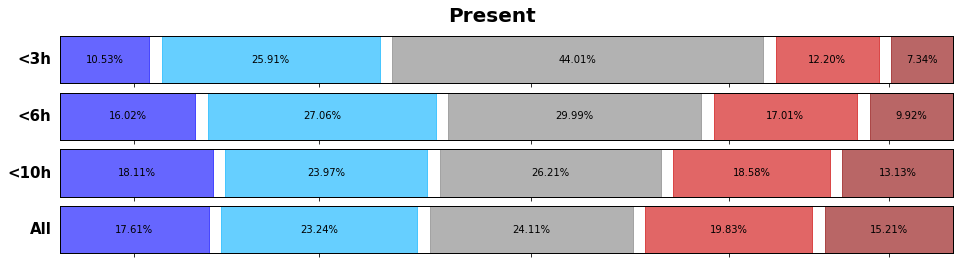

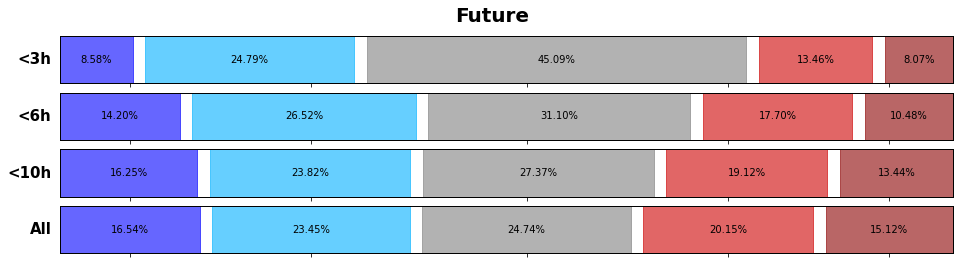

In [55]:
fig, axs = plt.subplots(nrows=4, figsize=(16,4), sharex=True)
create_single_variable_mosaic_plot_pctlabels(axs[0], present_dataframes_veryshortdurations,  loading_profile, 
    quintile_cats, color_mapping,  '<3h')
create_single_variable_mosaic_plot_pctlabels(axs[1], present_dataframes_shortdurations,  loading_profile, 
    quintile_cats, color_mapping,  '<6h')
create_single_variable_mosaic_plot_pctlabels(axs[2], present_dataframes_lessshortdurations,  loading_profile, 
    quintile_cats, color_mapping,  '<10h')
create_single_variable_mosaic_plot_pctlabels(axs[3], present_dataframes, loading_profile, 
    quintile_cats, color_mapping,  'All')
fig.suptitle('Present', fontweight="bold", fontsize=20);

fig, axs = plt.subplots(nrows=4, figsize=(16, 4), sharex=True)
create_single_variable_mosaic_plot_pctlabels(axs[0], future_dataframes_veryshortdurations,  loading_profile, 
    quintile_cats, color_mapping,  '<3h')
create_single_variable_mosaic_plot_pctlabels(axs[1], future_dataframes_shortdurations, loading_profile, 
    quintile_cats, color_mapping,  '<6h')
create_single_variable_mosaic_plot_pctlabels(axs[2], future_dataframes_lessshortdurations,  loading_profile, 
    quintile_cats, color_mapping,  '<10h')
create_single_variable_mosaic_plot_pctlabels(axs[3], future_dataframes,  loading_profile,
    quintile_cats, color_mapping,  'All')
fig.suptitle('Future', fontweight="bold", fontsize=20);

### Compare proportion of events in each loaading category between present and future
Cosider various subsets of events

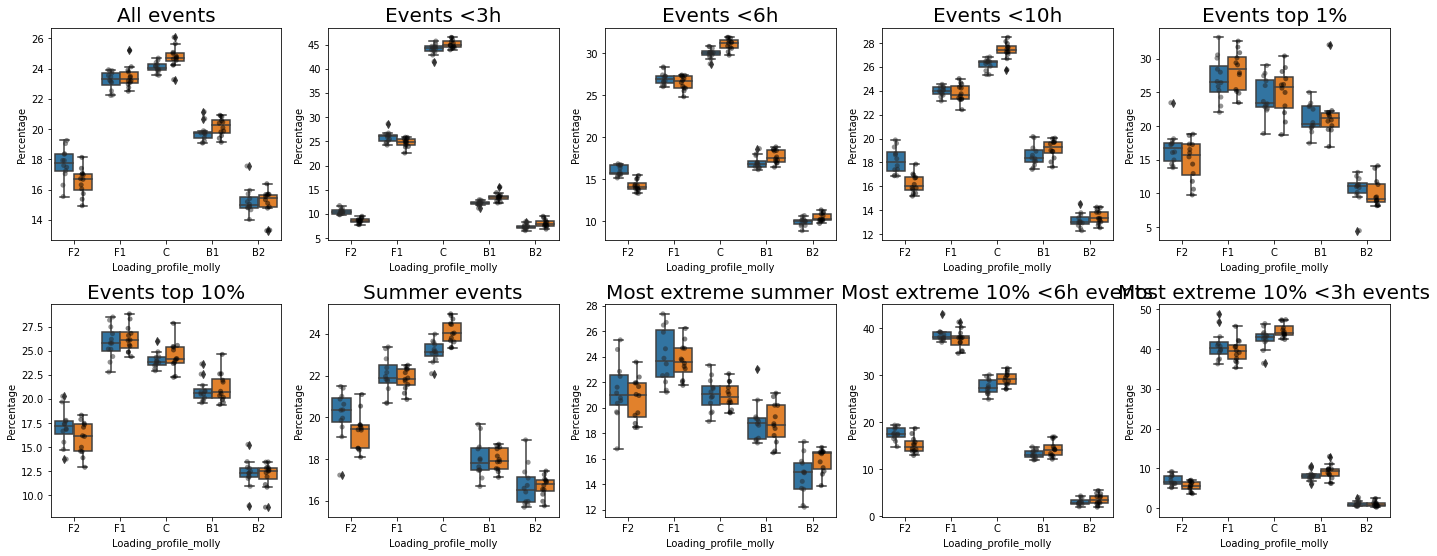

In [62]:
def plot_loading_profile_boxplot(axs, df, title):
    # Boxplot
    sns.boxplot(ax=axs, data=df, x=loading_profile, y='Percentage', hue='TimePeriod',
                order=order, dodge=True)
    
    # Strip plot for individual data points
    sns.stripplot(ax=axs, data=df, x=loading_profile, y='Percentage', hue='TimePeriod',
                  order=order, dodge=True, jitter=True, color='black', alpha=0.5)
    
    # Set title
    axs.set_title(title, fontsize=20)

    # Remove double legend
    axs.legend_.remove()

fig, axs = plt.subplots(ncols=5, nrows=2, figsize=(24,9))
fig.subplots_adjust(hspace=0.3)    
plot_loading_profile_boxplot(axs[0,0], combined_df_loading, 'All events')    
plot_loading_profile_boxplot(axs[0,1], combined_df_veryshortdurations_loading, 'Events <3h')        
plot_loading_profile_boxplot(axs[0,2], combined_df_shortdurations_loading, 'Events <6h')   
plot_loading_profile_boxplot(axs[0,3], combined_df_lessshortdurations_loading, 'Events <10h')   
plot_loading_profile_boxplot(axs[0,4], combined_df_loading_top1percent, 'Events top 1%') 
plot_loading_profile_boxplot(axs[1,0], combined_df_loading_top10percent, 'Events top 10%')   
plot_loading_profile_boxplot(axs[1,1], combined_df_loading_summer, 'Summer events')   
plot_loading_profile_boxplot(axs[1,2], combined_df_loading_top10percent_summer, 'Most extreme summer')   
plot_loading_profile_boxplot(axs[1,3], combined_df_loading_top10percent_shortdurations, 'Most extreme 10% <6h events')   
plot_loading_profile_boxplot(axs[1,4], combined_df_loading_top10percent_veryshortdurations, 'Most extreme 10% <3h events')   